# Mapping Global Resources with Basemap


# Inline output

The following code helps make all of the code samples in this notebook display their output properly. 

Note that you need to run this cell before running any other cell in the notebook. Otherwise your output will display in a separate window, or it won't display at all. If you try to run a cell and the output does not display in the notebook:
- Restart the IPython Notebook kernel.
- Run the following cell.
- Run the cell you were interested in again.

In [1]:
# This just lets the output of the following code samples
#  display inline on this page, at an appropriate size.
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = (12,8)

Python’s [matplotlib](http://matplotlib.org/) package is an amazing resource, and the [Basemap toolkit](http://matplotlib.org/basemap/) extends matplotlib’s capabilities to mapping applications.

We will use them to make maps of global resources. The first thing consists in `importing` these libraries into our environment. 

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# Making a simple map

Let's start out by making a simple map of the world. If you run the following code, you should get a nice map of the globe, with good clean coastlines:

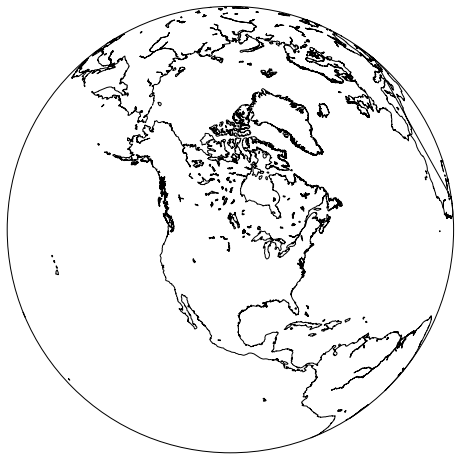

In [3]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
 
plt.show()

# Adding details

Let’s add some more detail to this map, starting with country borders. Add the following lines after `map.drawcoastlines()`:

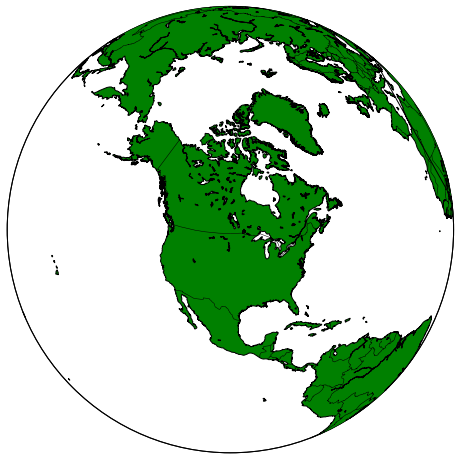

In [4]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()
 
plt.show()

Now let’s draw latitude and longitude lines:

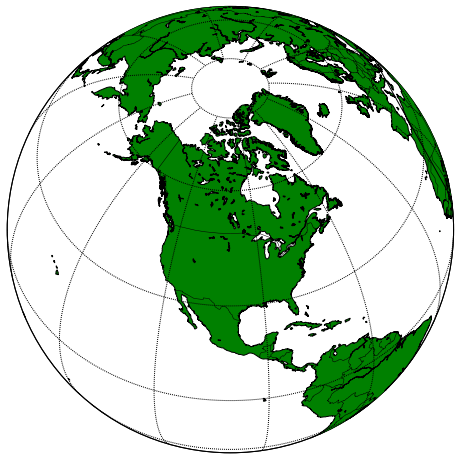

In [5]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

The `np.arange()` arguments tell where your latitude and longitude lines should begin and end, and how far apart they should be spaced.

Let’s play with two of the map settings, and then we'll move on to plotting data on this globe. Let’s start by adjusting the perspective. Change the latitude and longitude parameters in the original Basemap definition to -30 and 140. When you run the program, you should see your map centered along Australia:

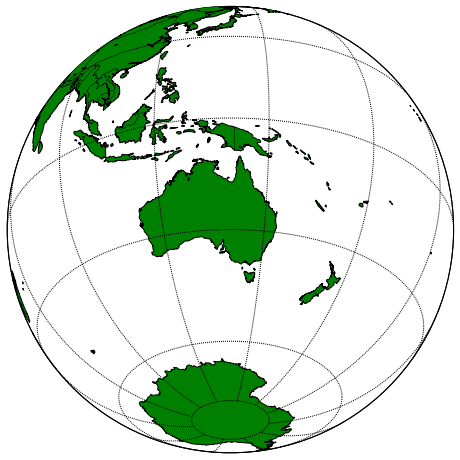

In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=-30, lon_0=140,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

Now let’s change the kind of map we're producing. Change the projection type to ‘robin’. You should end up with a Robinson projection instead of a globe:

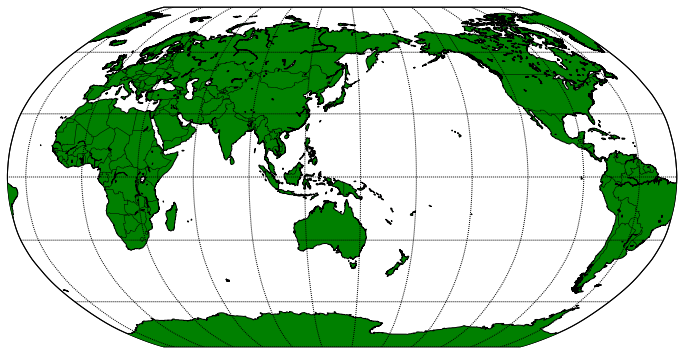

In [7]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='robin', lat_0=-30, lon_0=140,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

# Zooming in

Before we move on to plotting points on the map, let’s see how to zoom in on a region. This is good to know because there are many data sets specific to one region of the world, which would get lost when plotted on a map of the whole world. Some projections can not be zoomed in at all, so if things are not working well, make sure to look at the [documentation](http://matplotlib.org/basemap/api/basemap_api.html).

We are in Sydney, so let’s zoom in on that region. One way to zoom in is to specify the latitude and longitude of the lower left and upper right corners of the region you want to show. Let’s use a mercator projection, which supports this method of zooming. The notation for “lower left corner at 151.2 degrees east and 33.8 degrees south” is:
`llcrnrlon = 151.2, llcrnrlat =  -33.8650`

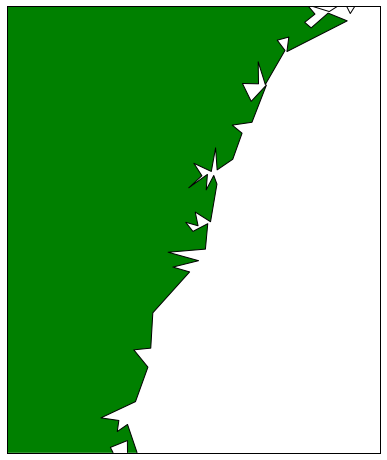

In [8]:
my_map = Basemap(projection='merc', lat_0=-33.8650, lon_0=151.2,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=150.0, llcrnrlat=-35.050,
    urcrnrlon=152.4, urcrnrlat=-32.6650)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

Note that the center of the map, given by lat_0 and lon_0, must be within the region you are zoomed in on.

This worked, but the map is pretty ugly. Let’s change the resolution to ‘h’ for ‘high’, and see what we get:

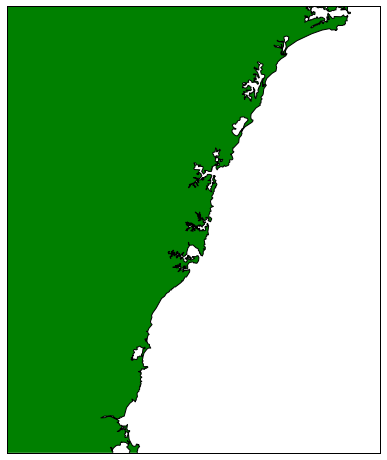

In [9]:
my_map = Basemap(projection='merc', lat_0=-33.8650, lon_0=151.2,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=150.0, llcrnrlat=-35.050,
    urcrnrlon=152.4, urcrnrlat=-32.6650)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

# Plotting points on a simple map

It's a testament to the hard work of many other people that we can create a map like the one above in less than 15 lines of code! Now let’s add some points to the map. Add the following lines just before plt.show() which represent the coordinates of Sydney:

`
lon = 151.2094
lat = -33.8650
x,y = my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=12)`

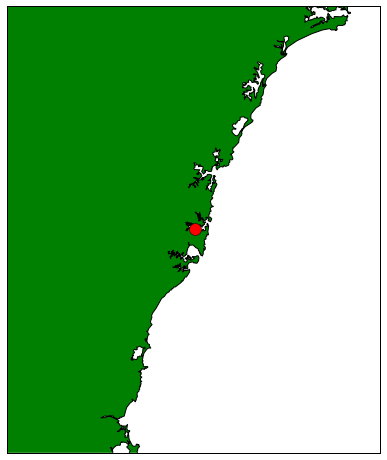

In [10]:
my_map = Basemap(projection='merc', lat_0=-33.8650, lon_0=151.2,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=150.0, llcrnrlat=-35.050,
    urcrnrlon=152.4, urcrnrlat=-32.6650)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
lon = 151.2094
lat = -33.8650
x,y = my_map(lon, lat)
my_map.plot(x, y, 'ro', markersize=12)
    
plt.show()

The only non-obvious line here is the `ro` argument, which tells basemap to use a red circle for the point. There are quite a number of colors and symbols you can use. For more choices, see the documentation for the [matplotlib.pyplot.plot](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot) function. The default marker size is 6, but that was too small on this particular map. A markersize of 12 shows up nicely on this map.

Plotting a single point is nice, but we often want to plot a large set of points on a map. Let’s show two other cities on the map: **Newcastle** and **Kiama**. We store the latitudes and longitudes of our points in two separate lists, map those to x and y coordinates, and plot those points on the map. 

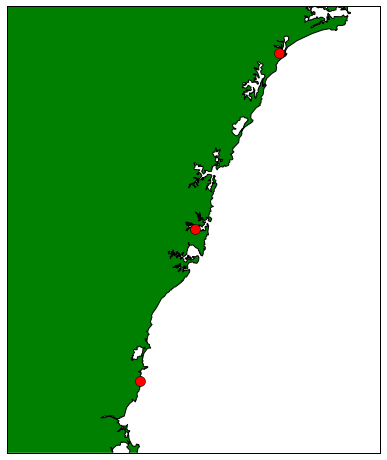

In [11]:
# KIAMA 34.6708° S, 150.8542° E
# NEWCATLE 32.9167° S, 151.7500° E
my_map = Basemap(projection='merc', lat_0=-33.8650, lon_0=151.2,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=150.0, llcrnrlat=-35.050,
    urcrnrlon=152.4, urcrnrlat=-32.6650)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

lons = [151.2094, 150.8542, 151.75] 
lats = [-33.8650, -34.6708, -32.9167]
x,y = my_map(lons, lats)
my_map.plot(x, y, 'ro', markersize=10)
 
plt.show()

# A global mineral resources dataset

The USGS maintains a **Mineral Resources Data System (MRDS)** on its [website](http://mrdata.usgs.gov/mrds/). RDS is a collection of reports describing metallic and nonmetallic mineral resources throughout the world. Included are deposit name, location, commodity, deposit description, geologic characteristics, production, reserves, resources, and references.

You can also choose from a variety of formats. In this first example, we'll look at how to parse a file in the **csv** format (comma-separated value). There are more convenient formats to work with such as json, but not all data sets are neatly organized. 

## Parsing the data

If we examine the first few lines of the text file of the dataset, we can identify the information that's most relevant to us:

In [12]:
!ls /workspace/dataset/

MRDS.csv  OilGas.csv  canyon_loc.csv  init  rsl  sl_fall  sl_rise


In [13]:
import csv

# Open the MRDS csv file
csvfile = open( "/workspace/dataset/MRDS.csv", "rb" )

# Read csv file according to dialect
reader = csv.reader( csvfile )

# Read header
header = reader.next()
print header

# Close input file
csvfile.close()

['i', 'dep_id', 'name', 'dev_stat', 'url', 'code_list', 'longitude', 'latitude']


For now, we're only interested in the latitude and longitude of each mineral resources. If we look at the first line, it looks like we're interested in the 7th and 8th columns of each line. In the directory where you save your program files, make a directory called “datasets”.

# Using Python's csv module to parse the data

We'll process the data using Python's [csv module module](http://docs.python.org/3.3/library/csv.html), which simplifies the process of working with csv files.

The following code produces two lists, containing the latitudes and longitudes of each mineral resources in the file:

In [14]:
# Open the MRDS data file.
filename = '/workspace/dataset/MRDS.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[7]))
        lons.append(float(row[6]))
        
# Display the first 5 lats and lons.
print('lats', lats[0:5])
print('lons', lons[0:5])

('lats', [55.62751, 55.4678, 56.01866, 56.05366, 56.02477])
('lons', [-132.38514, -132.15735, -130.35176, -130.06981, -130.3237])


We create empty lists to contain the latitudes and longitudes. Then we use the `with` statement to ensure that the file closes properly once it has been read, even if there are errors in processing the file.

With the data file open, we initialize a csv reader object. The `next()` function skips over the header row. Then we loop through each row in the data file, and pull out the information we want.

# Plotting mineral resources 

Using what we learned about plotting a set of points, we can now make a simple plot of these points:

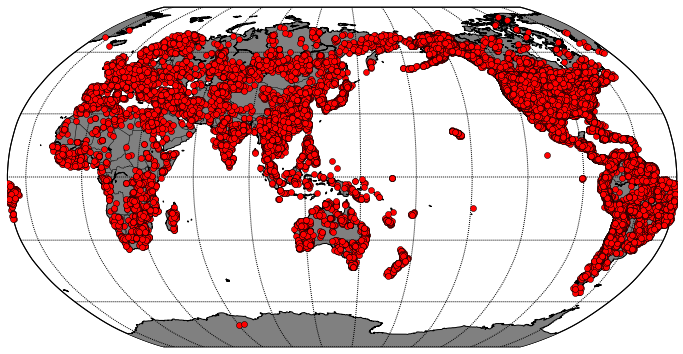

In [15]:
# Open the MRDS data file.
filename = '/workspace/dataset/MRDS.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[7]))
        lons.append(float(row[6]))

# Build Map
mrds_map = Basemap(projection='robin', lat_0=-30, lon_0=140,
              resolution='l', area_thresh=1000.0)
mrds_map.drawcoastlines()
mrds_map.drawcountries()
mrds_map.fillcontinents(color = 'gray')
mrds_map.drawmapboundary()
mrds_map.drawmeridians(np.arange(0, 360, 30))
mrds_map.drawparallels(np.arange(-90, 90, 30))
 
x,y = mrds_map(lons, lats)
mrds_map.plot(x, y, 'ro', markersize=6)
 
plt.show()

This is pretty cool; in about 20 lines of code we've turned a giant text file into an informative map. But there's one fairly obvious improvement we should make - let’s try to make the points on the map represent the type of commodity. We start out by reading the commodity type `code_list` (column 6) into a list along with the latitudes and longitudes of each resource:

In [16]:
# Open the MRDS data file.
filename = '/workspace/dataset/MRDS.csv'

# Create empty lists for the latitudes, longitudes and commodity.
lats, lons, commodity = [], [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[7]))
        lons.append(float(row[6]))
        commodity.append(row[5])
print commodity[0:10]

[' CU AU ', ' CU AG ', ' AG AU ', ' AG ', ' AG ', ' AU PB ', ' AU AS ', ' AU ', ' CU AG ', ' SB ']


The mineral commodities is composed of a range of mineral deposit types: AU, FE, CU, AG...

## Global gold resources distribution

As an example we will first extract all places containing some gold deposits. To do this we will loop over the lists of commodity types and look for `AU` in them, we will take the row ID (`auID`) of the lines containing the type `AU`. 

In [17]:
auIDs = [i for i, s in enumerate(commodity) if 'AU' in s]
print auIDs[0:10]

[0, 2, 5, 6, 7, 12, 13, 15, 17, 19]


Then we initialise 2 empty lists `lonAu` and `latAu`. For each index containing the gold commodity we will append our list with their global coordiantes.

In [18]:
# Initialisation of coordinates lists
lonAu = []
latAu = []

# Allocations of the list of coordinates containing the type gold
for id in auIDs:
    lonAu.append(lons[id])
    latAu.append(lats[id]) 

Now we will use the commodity type ID to select the mining resources we would like to plot, before we finish, let’s also add a title to our map. Our title needs to include the type of commodity visualised.

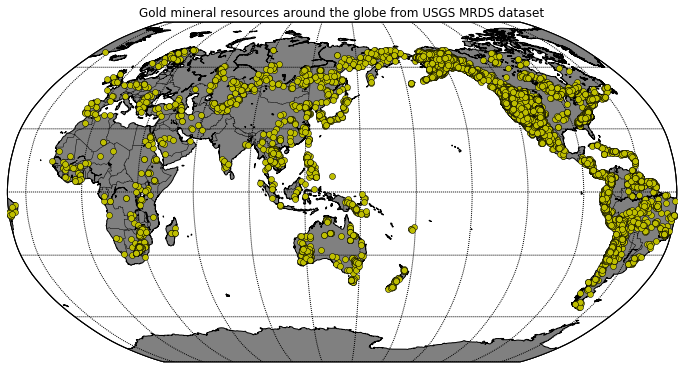

In [19]:
au_map = Basemap(projection='robin', lat_0=-30, lon_0=140,
              resolution='l', area_thresh=1000.0)
au_map.drawcoastlines()
au_map.drawcountries()
au_map.fillcontinents(color = 'gray')
au_map.drawmapboundary()
au_map.drawmeridians(np.arange(0, 360, 30))
au_map.drawparallels(np.arange(-90, 90, 30))

x,y = mrds_map(lonAu, latAu)
mrds_map.plot(x, y, 'yo', markersize=6)
        
title_string = 'Gold mineral resources around the globe from USGS MRDS dataset'
plt.title(title_string)
plt.show()

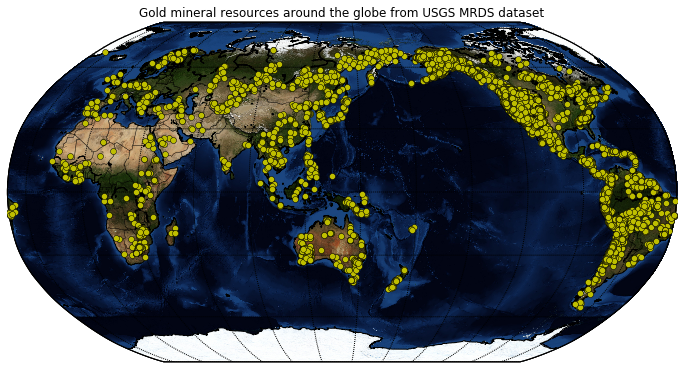

In [20]:
au_map = Basemap(projection='robin', lat_0=-30, lon_0=140,
              resolution='l', area_thresh=1000.0)
au_map.drawcoastlines()
au_map.drawcountries()
#au_map.fillcontinents(color = 'gray')
au_map.bluemarble()
au_map.drawmapboundary()
au_map.drawmeridians(np.arange(0, 360, 30))
au_map.drawparallels(np.arange(-90, 90, 30))

x,y = mrds_map(lonAu, latAu)
mrds_map.plot(x, y, 'yo', markersize=6)
        
title_string = 'Gold mineral resources around the globe from USGS MRDS dataset'
plt.title(title_string)
plt.show()

## Global iron resources distribution

In [21]:
feIDs = [i for i, s in enumerate(commodity) if 'FE' in s]
print feIDs[0:10]

[24, 70, 147, 148, 149, 152, 159, 178, 192, 284]


In [22]:
# Initialisation of coordinates lists
lonFe = []
latFe = []

# Allocations of the list of coordinates containing the type FE
for id in feIDs:
    lonFe.append(lons[id])
    latFe.append(lats[id]) 

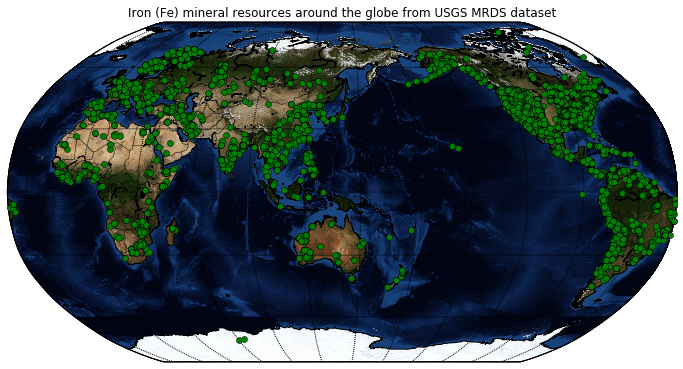

In [23]:
fe_map = Basemap(projection='robin', lat_0=-30, lon_0=140,
              resolution='l', area_thresh=1000.0)
fe_map.drawcoastlines()
fe_map.drawcountries()
#fe_map.fillcontinents(color = 'gray')
fe_map.bluemarble()
fe_map.drawmapboundary()
fe_map.drawmeridians(np.arange(0, 360, 30))
fe_map.drawparallels(np.arange(-90, 90, 30))

x,y = mrds_map(lonFe, latFe)
mrds_map.plot(x, y, 'go', markersize=6)
        
title_string = 'Iron (Fe) mineral resources around the globe from USGS MRDS dataset'
plt.title(title_string)
plt.show()